# Просторова обробка зображень: поелемента обробка

У даній лабораторній роботі розглянуто наступні приклади поелементої обробки зображень:
1. Негативне зображення
2. Зміна контрасту
3. Пере
4. Гама-корекція

### Імпортуємо необхдіні пакети та бібліотеки

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Перетворення зображення в негатив

Перетворення зображення у негатив зі значеннями інтенсивності пікселів в діапазоні [0, L-1] визначається наступним виразом:

$$\begin{eqnarray}
s &=& &L &-&1 &-&r
\end{eqnarray}$$

* де s - значення інтенсивності піксела вихідного зображення, L - максимальне значення інтенсивності пікселя вхідного та вихідного зображення, r - значення інтенсивності піксела вхідного зображення.

Даний тип перетворення використовується для підсилення білих та сірих деталей на фоні темних областей зображення.

Реалізуємо дане перетворення за допомогою наступних операції:
1. доступу до окремих пікселів
2. доступу до групи пікселів

Для цього зчитаємо та завантажимо вхідне чорно-біле зображення, відобразимо та визначимо його параметри:

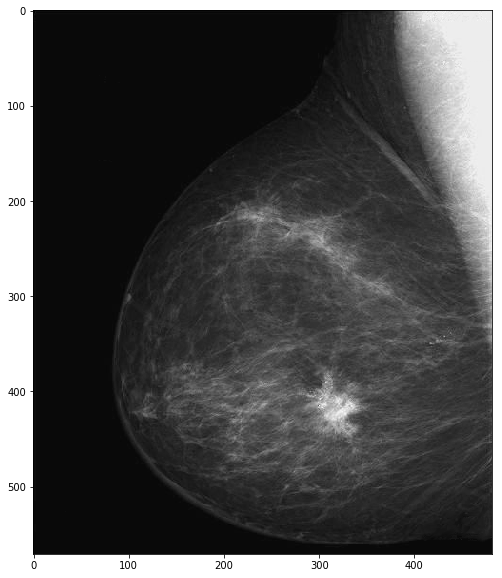

In [36]:
img = cv2.imread("./examples/Fig0304.tif", 0)
plt.figure(figsize=(10,10))
plt.imshow(img, cmap = 'gray'); plt.show();


In [31]:
height = img.shape[0] 
width = img.shape[1]
print(img.dtype)

uint8


Підготуємо пусте вихідне зображення - масив нулів із розміром тестового чороно-білого зображення.

In [32]:
neg_img = np.zeros(img.shape)

Згідно приведеної формули, поелементно визначимо інтенсивність пікселів вихідного зображення:

In [37]:
for row in range(height):
    for col in range(width):
        neg = np.iinfo('uint8').max - 1 - img[row][col]
        neg_img[row][col] = neg

Відобразимо вихідне зображення.

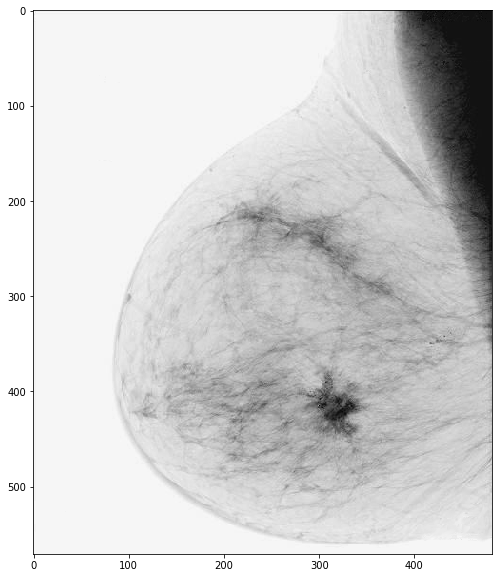

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(neg_img, cmap='gray'); plt.show();

Реалізуємо перетворення в негатив, використовуючи доступ до групи пікселів. Бібліотека NumPy дозволяє виконувати операції над всіма елементами матриці використовуючи синтаксис звичайних арифметичних операцій.

In [41]:
neg_img1 = np.iinfo('uint8').max - 1 - img

Відобразимо вихідне зображення.

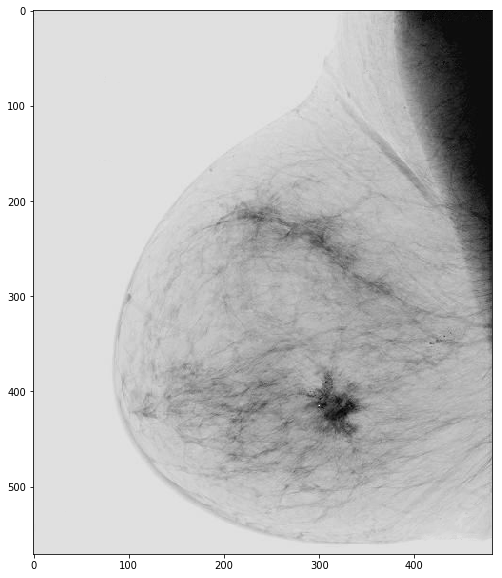

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(neg_img1, cmap='gray'); plt.show();

<h2><b>Contrast enhancement</b></h2>

<h3>Load PIL and pylab modules</h3>

In [19]:
from PIL import Image, ImageEnhance
from pylab import array, plot, show, axis, arange, figure, uint8
import numpy as np

<h3><i>First approach: </i>whole image processing with PIL module<h3>

<h3>Read sample image</h3>

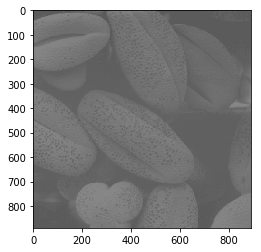

In [20]:
img = Image.open("./examples/Fig0310b.tiff")
plt.imshow(img); plt.show();

<h3>Contrast enhancement</h3>

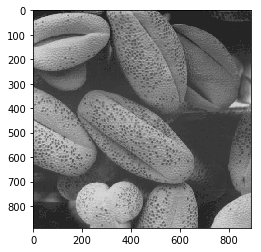

In [21]:
enhancer = ImageEnhance.Contrast(img)
enhanced_im = enhancer.enhance(4.0)
plt.imshow(enhanced_im); plt.show();

<h3><i>Second approach: </i>variable parametrs<h3>

<h3>Setting parametrs</h3>

In [22]:
img = cv2.imread('./examples/Fig0310b.tiff', 0)
alpha = 1.0 # Simple contrast control
beta = 5    # Simple brightness control
contr_img = np.zeros(img.shape, img.dtype)

<h3>Contrast enhancement</h3>

In [23]:
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        contr_img[y,x] = np.clip(alpha*img[y,x] + beta, 0, 255)

<h3>Plot contrast enhancement sample image</h3>

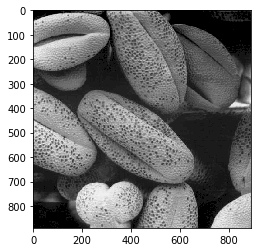

In [25]:
plt.imshow(contr_img, cmap='gray'); plt.show();

## Гама-корекція

<h3>Setting parametrs</h3>

<h3>Load numpy module</h3>

In [26]:
import numpy as np

<h3>Read sample image</h3>

In [27]:
in_img_grayscale = cv2.imread("./examples/Fig0308a.tif", 0)

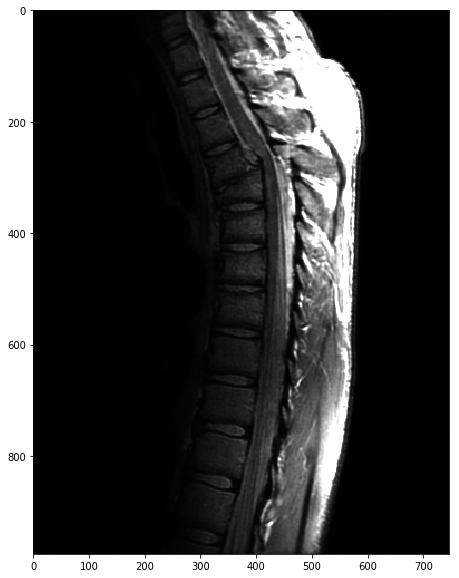

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(in_img_grayscale, cmap = 'gray'); plt.show();

<h4>First Gamma correction</h4>

In [29]:
gamma = 0.6
img2 = np.power(in_img_grayscale, gamma)

<h4>Second Gamma correction</h4>

In [30]:
gamma = 0.4
img3 = np.power(in_img_grayscale, gamma)

<h4>Third Gamma correction</h4>

In [31]:
gamma = 0.3
img4 = np.power(in_img_grayscale, gamma)

<h3>Plot gamma corrected sample image</h3>

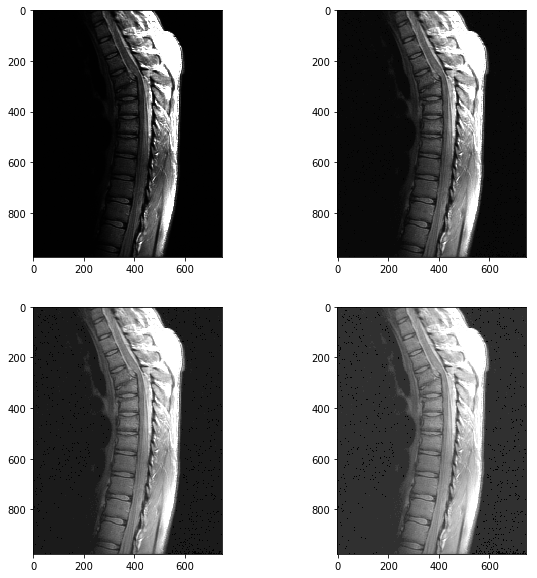

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(in_img_grayscale, cmap = 'gray'); 
plt.subplot(222)
plt.imshow(img2, cmap='gray');
plt.subplot(223)
plt.imshow(img3, cmap='gray'); 
plt.subplot(224)
plt.imshow(img4, cmap='gray'); plt.show();

## Перетворення гістограми, еквалізація

<h3>Getting histogram</h3>

In [33]:
img = cv2.imread('./examples/Fig0310b.tiff')
hist,bins = np.histogram(img.ravel(),256,[0,256])

<h3>Plot histogram</h3>

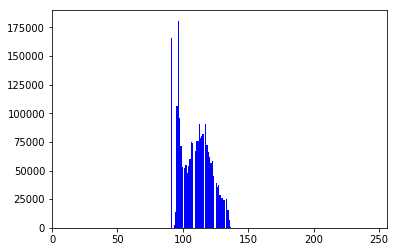

In [34]:
plt.hist(img.ravel(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.show()

<h3>Histogram Equalization</h3>

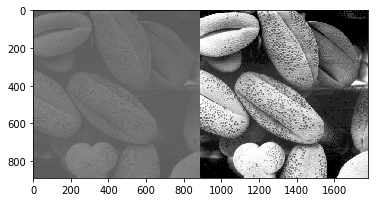

In [35]:
img = cv2.imread('./examples/Fig0310b.tiff', 0)

equ = cv2.equalizeHist(img)
res = np.hstack((img, equ)) 
plt.imshow(res, cmap='gray'); plt.show();